# Brain tumor classification

In [4]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping 
import time

2022-02-16 16:10:34.262383: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-16 16:10:34.262400: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
#wczytanie
batch_size = 32
img_height = 512
img_width = 512
data_dir = "BrainTumorDataSet/"


In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 4508 files belonging to 2 classes.
Using 3607 files for training.


2022-02-16 16:10:35.524204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-16 16:10:35.524220: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-16 16:10:35.524236: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hpkk): /proc/driver/nvidia/version does not exist
2022-02-16 16:10:35.524464: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4508 files belonging to 2 classes.
Using 901 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['BrainTumor', 'Healthy']


2022-02-16 16:10:37.792204: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


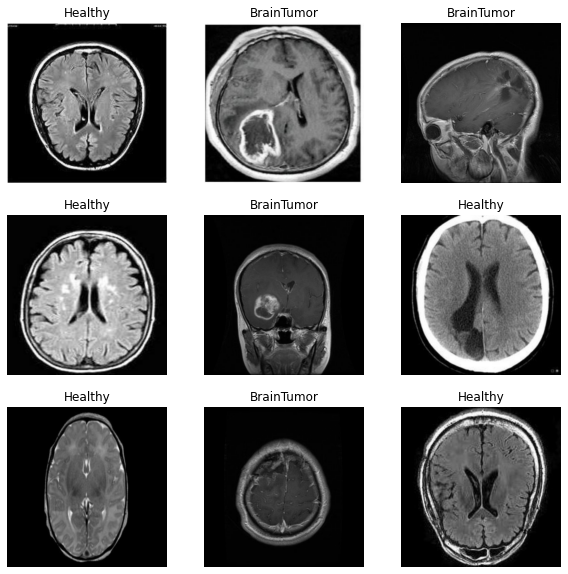

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
#wymiary
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 512, 512, 3)
(32,)


In [11]:
#standaryzacja na [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

## Model

In [12]:
def create_model():
    shape_img = (512,512,3)
    num_classes = 2
    model = Sequential([
        tf.keras.layers.Rescaling(1./255),
        
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(num_classes),
        tf.keras.layers.Activation('softmax')
    ])


    model.compile(
        optimizer='adam',
        loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
    
    return model

In [13]:
model = create_model()

In [14]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3


2022-02-16 16:10:47.768938: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2147483648 exceeds 10% of free system memory.
2022-02-16 16:10:53.312065: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2147483648 exceeds 10% of free system memory.


  1/113 [..............................] - ETA: 15:46 - loss: 0.7105 - accuracy: 0.5000

2022-02-16 16:10:55.168399: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2147483648 exceeds 10% of free system memory.
2022-02-16 16:11:00.732289: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2147483648 exceeds 10% of free system memory.


  2/113 [..............................] - ETA: 13:38 - loss: 13.1969 - accuracy: 0.5000

2022-02-16 16:11:02.530556: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2147483648 exceeds 10% of free system memory.


113/113 [==============================] - 952s 8s/step - loss: 0.6857 - accuracy: 0.7862 - val_loss: 0.2696 - val_accuracy: 0.9179
Epoch 2/3
113/113 [==============================] - 925s 8s/step - loss: 0.2034 - accuracy: 0.9271 - val_loss: 0.1529 - val_accuracy: 0.9612
Epoch 3/3
113/113 [==============================] - 943s 8s/step - loss: 0.0882 - accuracy: 0.9706 - val_loss: 0.1577 - val_accuracy: 0.9567


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0

In [16]:
model.count_params()

134294914

###   Zapis modelu

In [18]:
model.save('model.h5')

### Odtwarzanie modelu

In [ ]:
new_model = tf.keras.models.load_model('model.h5')
new_model.summary()

## Predykcja

In [1]:
class_names= ['BrainTumor', 'Healthy']
data_test = "test/"
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_test,
    validation_split = 0.5,
    subset="validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)
prediction = new_model.predict(test_ds)
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(len(prediction)):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(prediction[i])])
        plt.axis("off")

NameError: name 'tf' is not defined